 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [3]:
# Count nulls
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()

In [5]:
# Checking if Nulls were properly dropped: yes, it did
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()

In [9]:
# Checking if Nulls were properly dropped: yes, it did
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types

# Removed the dollar signs, commas, and any spaces.  Then converted the remaining object to an integer.
sp500_df["Close"] = sp500_df["Close"].replace('[\$\,\.]',"",regex=True).astype(int)

# Re-run dtypes to see that it worked: yes, it did
sp500_df.dtypes

Close    int64
dtype: object

In [13]:
# Sort by index to have dataframe in correct time order

sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,144449
2012-10-02,144575
2012-10-03,145099
2012-10-04,146140
2012-10-05,146093


In [14]:
# Calculate Daily Returns

sp500_returns = sp500_df.pct_change()
sp500_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls

sp500_returns = sp500_returns.dropna()
sp500_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename `Close` Column to be specific to this portfolio.

sp500_returns = sp500_returns.rename(columns={'Close': 'S&P 500'})
sp500_returns.head()


,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns = pd.concat([whale_df, algo_df, sp500_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

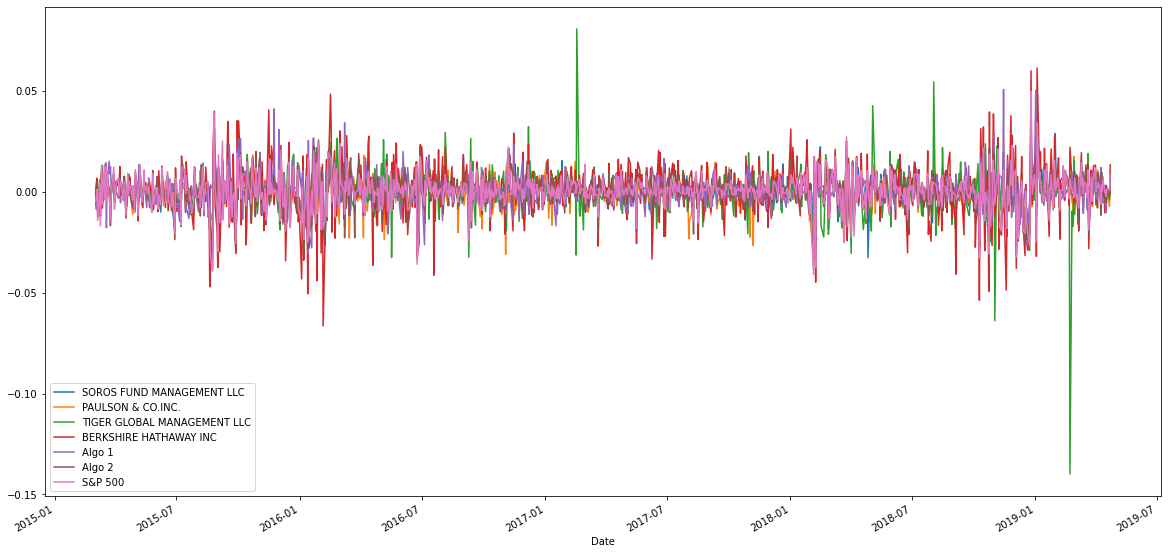

In [18]:
# Plot daily returns of all portfolios

combined_returns.plot(figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

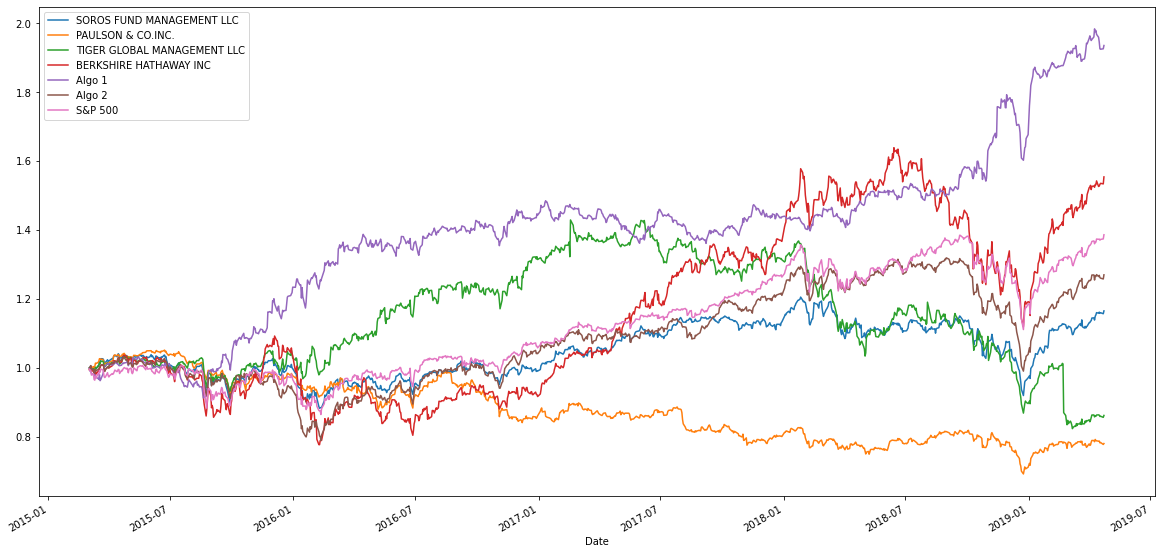

In [19]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns

cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

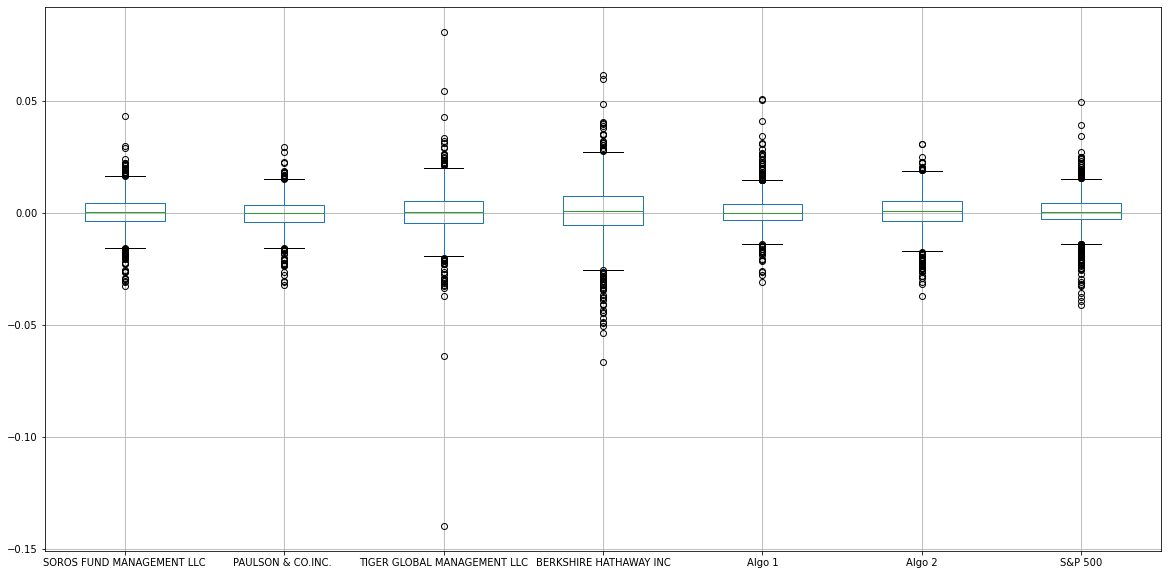

In [20]:
# Box plot to visually show risk

combined_returns.boxplot(figsize=(20,10))


### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios

combined_std = combined_returns.std()
combined_std = combined_std.sort_values(ascending=False)
combined_std.head(10)

# Determine which portfolios are riskier than the S&P 500

# BERKSHIRE HATHAWAY INC & TIGER GLOBAL MANAGEMENT LLC are riskier than the S&P 500

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500

sp500_std = combined_returns["S&P 500"].std()
print(f"S&P 500 Standard Deviation: {sp500_std}")

# Determine which portfolios are riskier than the S&P 500

# BERKSHIRE HATHAWAY INC & TIGER GLOBAL MANAGEMENT LLC are riskier than the S&P 500


S&P 500 Standard Deviation: 0.008553731597758199


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = combined_std * np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False)
annualized_std.head(10)

# BERKSHIRE HATHAWAY INC & TIGER GLOBAL MANAGEMENT LLC are riskier than the S&P 500


BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

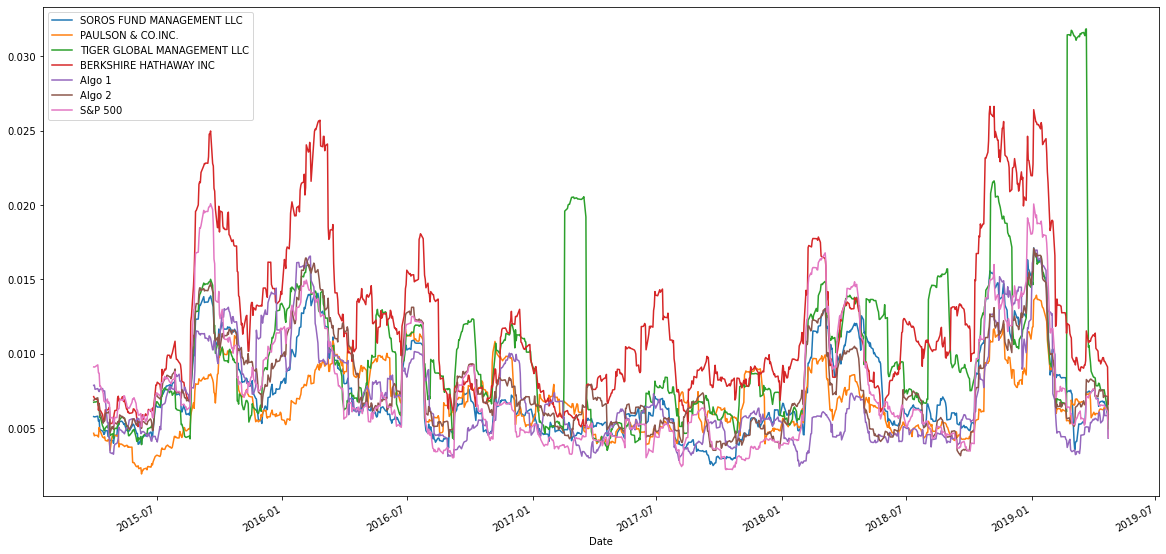

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_returns.rolling(window=21).std().plot(figsize=(20,10))

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [30]:
# Calculate the correlation

correlation = combined_returns.corr()


# Display de correlation matrix

correlation



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:xlabel='S&P 500', ylabel='Algo 2'>

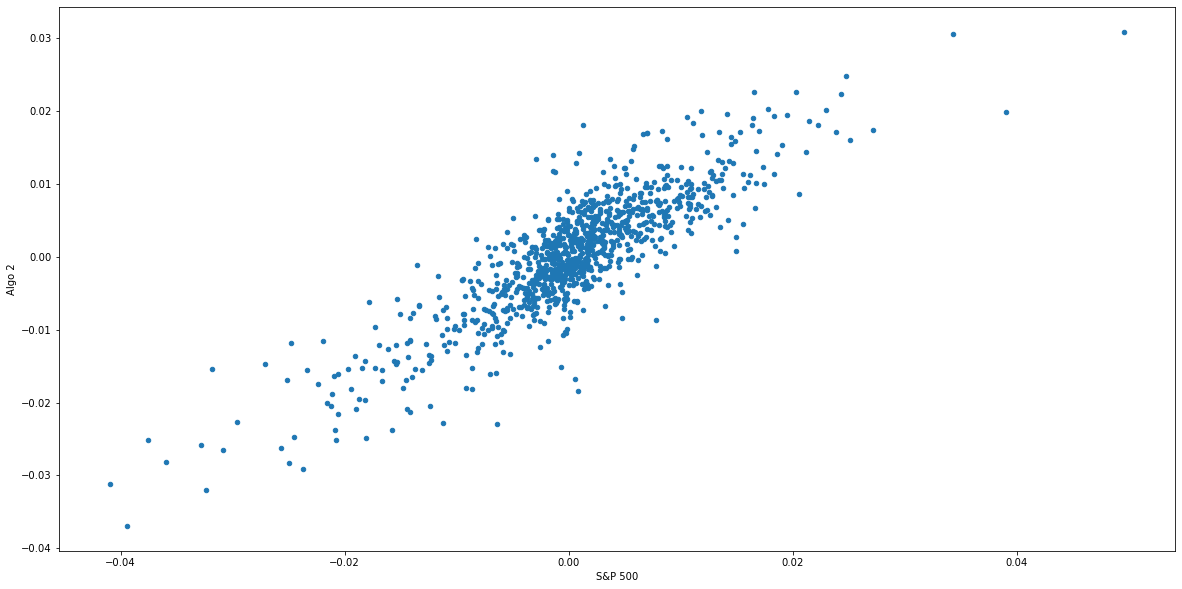

In [32]:
# Display de correlation matrix: 
# Correlation scatter plot comparing Algo 2 vs. S&P 500
# We can see a high correlation

combined_returns.plot(kind="scatter", y = "Algo 2", x = "S&P 500", figsize = (20,10))



<AxesSubplot:>

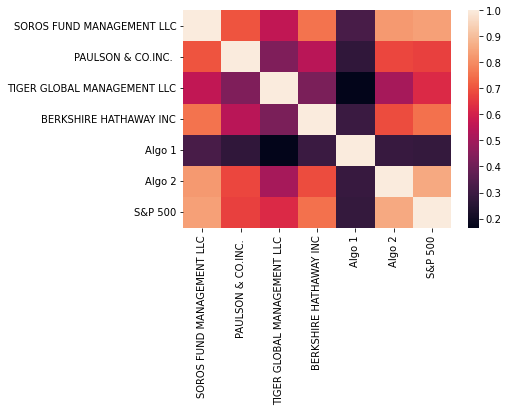

In [33]:
# Display de correlation heatmap to make it easier to see the correlation

sns.heatmap(correlation)

In [34]:
# Portfolios Algo 2 and Soros Fund have the highest correlation to the S&P 500

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Soros Fund Returns vs. S&P 500 Returns'}, xlabel='Date'>

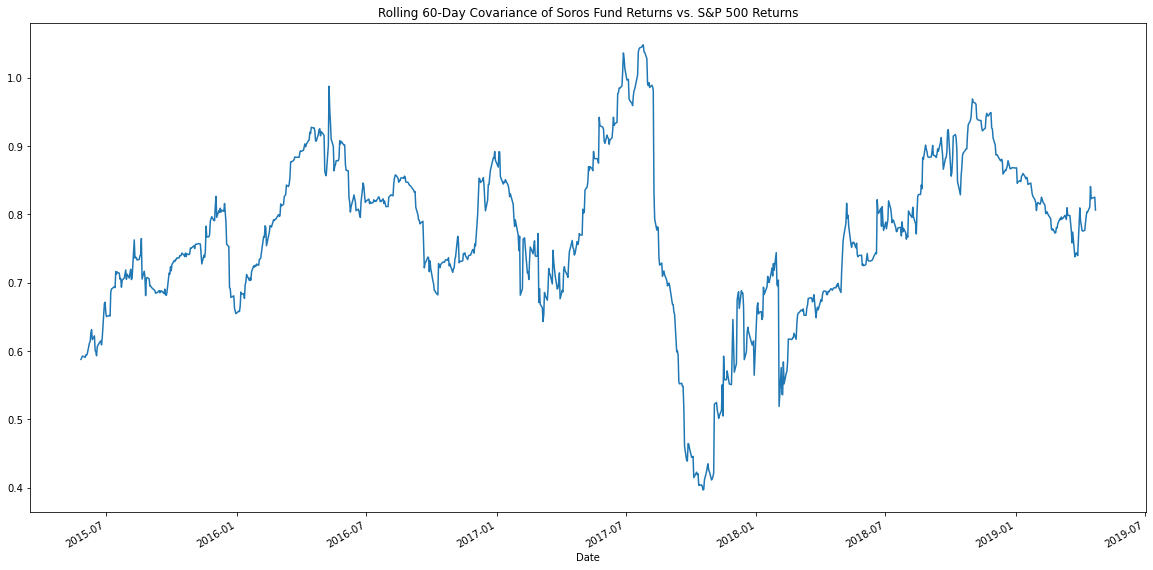

In [36]:
# Plot beta trend

# 60-day rolling covariance of Soros Fund vs. S&P 500
rolling_covariance_soros = combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_returns['S&P 500'])


# 60-day rolling variance of S&P 500
rolling_variance_sp500 = combined_returns['S&P 500'].rolling(window=60).var()


# 60-day rolling beta of Soros Fund and plot the data
rolling_beta_soros = rolling_covariance_soros / rolling_variance_sp500

# Plot the 60-day rolling trend
rolling_beta_soros.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Soros Fund Returns vs. S&P 500 Returns') 





In [35]:
# Calculate covariance of a single portfolio

covariance_soros = combined_returns['SOROS FUND MANAGEMENT LLC'].cov(combined_returns['S&P 500'])
print(f"Soros Fund Covariance: {covariance_soros}")

# Calculate variance of S&P 500

variance_sp500 = combined_returns['S&P 500'].var()
print(f"S&P 500 Variance: {variance_sp500}")

# Computing beta

soros_beta = covariance_soros / variance_sp500
print(f"Soros Fund Beta: {soros_beta}")



Soros Fund Covariance: 5.658503197203612e-05
S&P 500 Variance: 7.316632424648704e-05
Soros Fund Beta: 0.7733753547794627


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

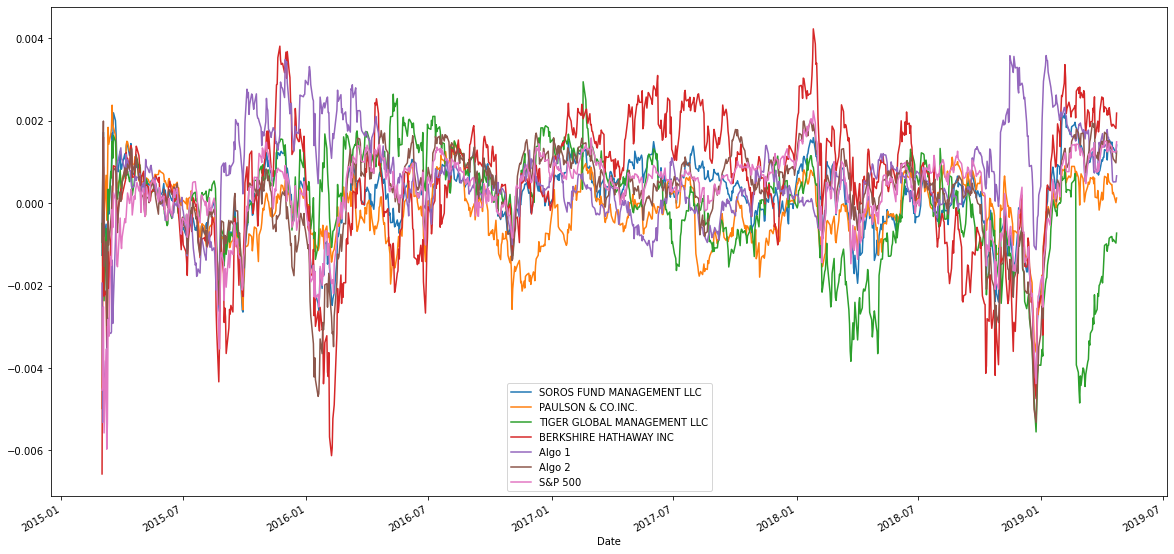

In [38]:
# Use `ewm` to calculate the rolling window

# DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None)

# Calculate
EWMA_combined_returns = combined_returns.ewm(halflife=21).mean()

# Plot
EWMA_combined_returns.plot(figsize=(20,10))


# combined_df_ewm = combined_df.ewm(span = 21,adjust = False).mean()
# (1+combined_df_ewm).cumprod().plot(figsize = (18,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:title={'center':'Sharpe Ratios'}>

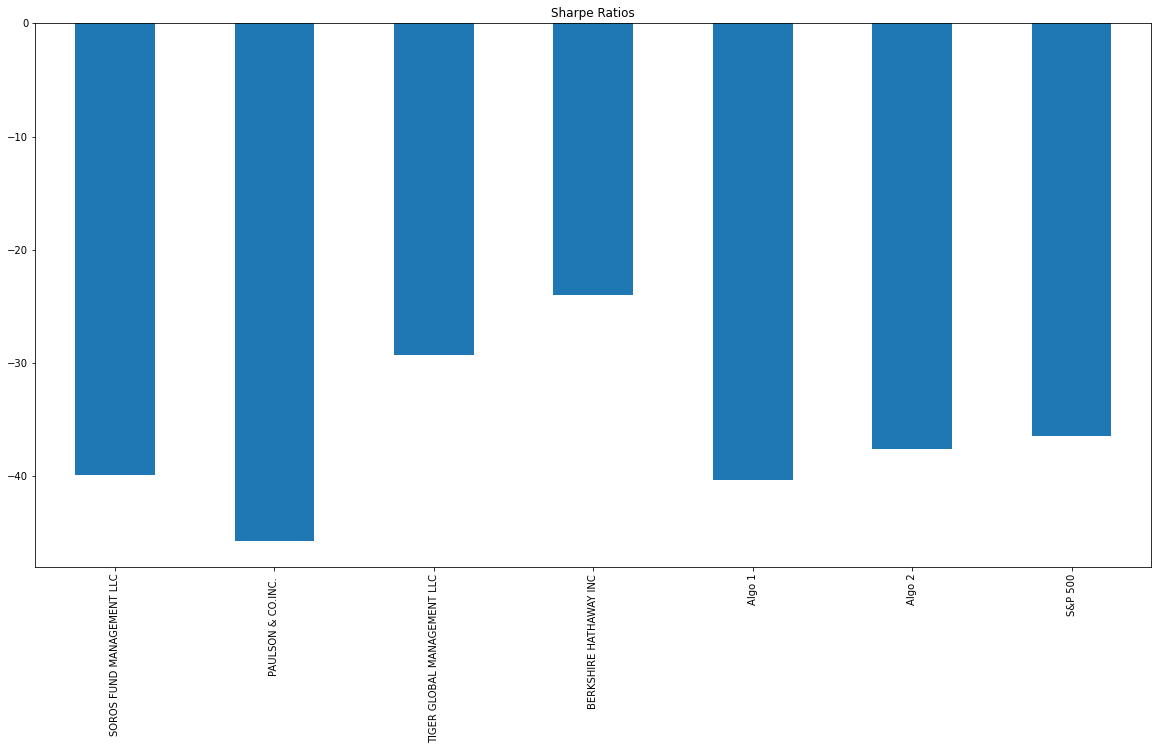

In [46]:
# Annualized Sharpe Ratios

# Assuming a risk free rate of 2%
risk_free_rate = .02

combined_sharpe_ratios = ((combined_returns.mean()-(risk_free_rate)) * 252) / (combined_returns.std() * np.sqrt(252))

combined_sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios", figsize = (20,10))

# combined_sharpe_ratios = ((combined_returns.mean()-combined_returns[risk_free_rate].mean()) * 252) / (combined_returns.std() * np.sqrt(252))
# combined_sharpe_ratios.plot()



# combined_returns.tail()
#  start = 2015-03-03
#  end = 2019-04-23



In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!